![Texto alternativo](https://dreamlearning.ai/wp-content/uploads/2018/09/Webp.net-gifmaker-2.gif)

 ![Texto alternativo](https://dreamlearning.ai/wp-content/uploads/2018/09/cnn.png )

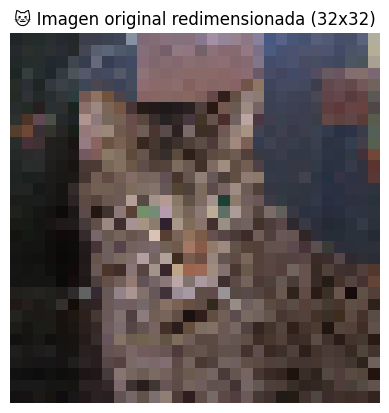

📊 Matriz RGB (Canal R) - shape: (32, 32, 3)
[[33 38 35 42 38]
 [37 43 38 44 42]
 [32 36 37 33 35]
 [29 54 37 31 51]
 [39 44 32 51 58]]


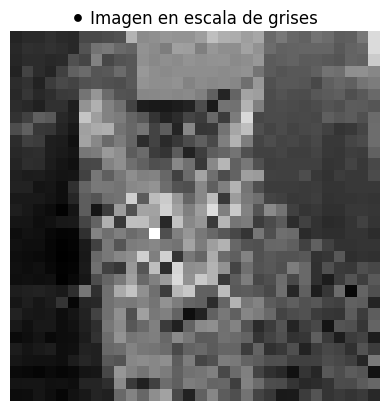

📊 Matriz en escala de grises (32x32):
[[36 41 41 45 41]
 [40 46 44 47 44]
 [38 42 43 39 41]
 [35 59 43 37 57]
 [42 47 35 55 64]]


/home/vscode/.local/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


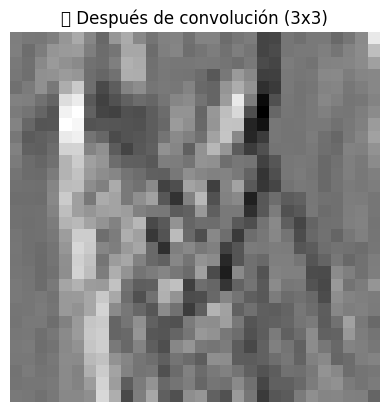

📊 Matriz después de convolución (30x30):
[[ 14.   2.  -2.  17.  69.]
 [ 17. -24.  12.  68.  79.]
 [  6. -17.  41.  79.  58.]
 [  0. -20.  57.  60.  81.]
 [-18.   8.  56.   1. 122.]]


/home/vscode/.local/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127744 (\N{CYCLONE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


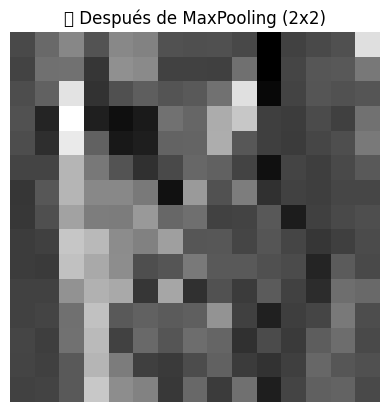

📊 Matriz después de MaxPooling (15x15):
[[ 17.  68. 116.  33. 119.]
 [  6.  79.  81. -14. 132.]
 [ 23.  56. 268. -21.  28.]
 [ 29. -42. 312. -52. -78.]
 [ 22. -27. 277.  57. -63.]]


In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Mostrar matrices grandes
np.set_printoptions(precision=2, suppress=True, linewidth=150)

# 1. Cargar la imagen
img_path = "cat.jpg"
image = cv2.imread(img_path)

if image is None:
    raise FileNotFoundError("❌ La imagen 'cat.jpg' no fue encontrada en la carpeta actual.")

# 2. Convertir BGR a RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# 3. Redimensionar a 32x32
image_resized = cv2.resize(image_rgb, (32, 32))

# Mostrar imagen original
plt.imshow(image_resized)
plt.title("🐱 Imagen original redimensionada (32x32)")
plt.axis('off')
plt.show()

# Mostrar matriz RGB (solo canal R por simplicidad)
print("📊 Matriz RGB (Canal R) - shape:", image_resized.shape)
print(image_resized[:5, :5, 0])  # Primeras 5 filas y columnas del canal rojo

# 4. Convertir a escala de grises
image_gray = cv2.cvtColor(image_resized, cv2.COLOR_RGB2GRAY)

plt.imshow(image_gray, cmap='gray')
plt.title("⚫ Imagen en escala de grises")
plt.axis('off')
plt.show()

print("📊 Matriz en escala de grises (32x32):")
print(image_gray[:5, :5])  # Primeras 5 filas y columnas

# 5. Filtro de convolución 3x3 (bordes verticales)
kernel = np.array([
    [1, 0, -1],
    [1, 0, -1],
    [1, 0, -1]
])

# Función de convolución
def convolve2d(image, kernel):
    kernel = np.flipud(np.fliplr(kernel))  # rotar 180°
    kh, kw = kernel.shape
    h, w = image.shape
    output = np.zeros((h - kh + 1, w - kw + 1))
    for i in range(output.shape[0]):
        for j in range(output.shape[1]):
            region = image[i:i+kh, j:j+kw]
            output[i, j] = np.sum(region * kernel)
    return output

# Aplicar convolución
conv_output = convolve2d(image_gray, kernel)

plt.imshow(conv_output, cmap='gray')
plt.title("🎯 Después de convolución (3x3)")
plt.axis('off')
plt.show()

print("📊 Matriz después de convolución (30x30):")
print(conv_output[:5, :5])  # Primeras 5 filas y columnas

# 6. MaxPooling 2x2
def max_pooling2d(image, size=2, stride=2):
    h, w = image.shape
    pooled = np.zeros((h // stride, w // stride))
    for i in range(0, h, stride):
        for j in range(0, w, stride):
            window = image[i:i+size, j:j+size]
            pooled[i//stride, j//stride] = np.max(window)
    return pooled

pooled_output = max_pooling2d(conv_output)

plt.imshow(pooled_output, cmap='gray')
plt.title("🌀 Después de MaxPooling (2x2)")
plt.axis('off')
plt.show()

print("📊 Matriz después de MaxPooling (15x15):")
print(pooled_output[:5, :5])  # Primeras 5 filas y columnas
